In [1]:
%matplotlib inline

In [8]:
import h5py
import numpy as np

with h5py.File("data/len10-var15-trj.h5", "r") as f:
    embedding_high = f["layer3"][...]
    embedding_high = np.array(embedding_high)

labels = []
with open("data/len10-var15-trj.label", "r") as f:
    for label in f:
        labels.append(int(label))


[1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020000,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020007,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020016,
 1020018,
 1020018,
 1020018,
 1020018,
 1020018,
 1020018,
 1020018,
 1020018,
 1020018,
 1020018,


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 4.723651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.140846
[t-SNE] KL divergence after 1000 iterations: 0.015362


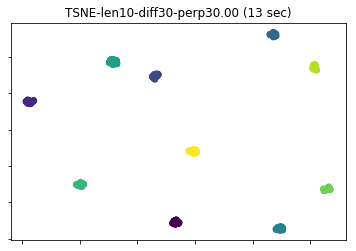

In [16]:
from sklearn import manifold
from time import time
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

perplexity = 30.0
tsne = manifold.TSNE(perplexity=perplexity, init='random', verbose=1, method='exact')
t0 = time()
embedding_low = tsne.fit_transform(embedding_high)
t1 = time()

length = len(set(labels))
variance = len(labels) // length
colors = [idl for idl in range(length) for v in range(variance)]

fig, ax = plt.subplots()
ax.scatter(embedding_low[:, 0], embedding_low[:, 1], c=colors)
ax.set_title("TSNE-len%d-diff%d-perp%.2f (%.2g sec)" % (length, variance, perplexity, t1-t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.show()



